# Food choices and preferences of college students

This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 125 responses from students. Data is raw and uncleaned. Data comes from [kaggle](https://www.kaggle.com/borapajo/food-choices/data).<br>
Dataset was created to take a look at student's nutrition habits:<br>
    - What does influence on students cooking frequency?
    - Are students who are active in sports put more attention to nutritional check than the others?
    - Are kids and parents have similar cooking habits?
    - Is there any correlation between types of world cuisines that students like or do not like? 
In this notebook we will visualize some of these features and try find any connections.<br>
<br>
**The main goals:**<br>
    - Data exploration/some cleaning.
    - Data analysis.
    - Visualization.

<br>
*Dataset can be used in natural language processing.

# Imported libraries

In [1]:
# Data engineering.
import pandas as pd
import numpy as np

# Regular expressions module.
import re

# Data visualization and frame's visualization options.
import missingno as msno # Copyright (c) 2016 Aleksey Bilogur
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

In [2]:
# Load data
df = pd.read_csv('food_coded.csv')

# Data exploration

In [3]:
# Check data frame's shape
df.shape

(125, 61)

In [4]:
df.head() 

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
# Data features
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [6]:
# Explore the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GPA,123,38,3.5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,125,NaN,NaN,NaN,1.392,0.490161,1,1,1,2,2
breakfast,125,NaN,NaN,NaN,1.112,0.316636,1,1,1,1,2
calories_chicken,125,NaN,NaN,NaN,577.32,131.214,265,430,610,720,720
calories_day,106,NaN,NaN,NaN,3.0283,0.639308,2,3,3,3,4
calories_scone,124,NaN,NaN,NaN,505.242,230.841,315,420,420,420,980
coffee,125,NaN,NaN,NaN,1.752,0.43359,1,2,2,2,2
comfort_food,124,124,"rice, potato, seaweed soup",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons,124,107,boredom,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfort_food_reasons_coded,106,NaN,NaN,NaN,2.69811,1.97204,1,2,2,3,9


## Features dtypes


In the table above we have some features which need to get converted. Two columns - unique and top, gives us some help. Values of these columns, which are not missing can be interpreted as values of object features. Very high percentage of their values is unique what is reasonable considering the method it was gathered (questionnaire). Most of them have already prepared numeric features with some sort of weighting. However two of them looks suspicious to me. 'GPA' and 'weight' features have many unique values and the highest values of 'top' column are numbers. It looks like their dtype might be wrong and they can contain **blended values**. Other features have float types with '1-2' type values or some sort of range of numbers. For the second kind we need convert ranges into roughly the same scale.

In [7]:
from collections import Counter
# Explore datatypes
col_dtypes = np.array([df[x].dtype for x in df.columns])

# Quick features dtype counter
for i, j in Counter(col_dtypes).items():
    print('dtype: ', i, ' --- ', 'value: ', j)

dtype:  object  ---  value:  14
dtype:  float64  ---  value:  20
dtype:  int64  ---  value:  27


As we mentioned above, we will explore object features in search of blended values. It's necessary to fix it for further correlation investigation and results visualization. Now let's create a series with object dtype features.

In [8]:
# Quick look at features list with object datatype
df_obj = pd.DataFrame({'dtype_': col_dtypes}, index=df.columns)

In [9]:
# Slice the dtype
df_obj = df_obj[df_obj['dtype_'] == object]
df_obj

,dtype_
GPA,object
comfort_food,object
comfort_food_reasons,object
diet_current,object
eating_changes,object
father_profession,object
fav_cuisine,object
food_childhood,object
healthy_meal,object
ideal_diet,object


Create a data frame with more details about possible blended values or missing data.

In [10]:
types = {}

for feature in df_obj.index.values:
    feat_dict = {}
    
    for value in df[feature].values:
        # Take out dtype from a string with regex
        dtype = str(type(value))
        match = re.search("int|float|str", dtype)

        # Create a dict with number of dtypes for particular feature
        if match.group() not in feat_dict.keys():
            feat_dict[match.group()] = 1
        else:
            feat_dict[match.group()] += 1
    types[feature] = feat_dict
    # Clean up the dict before next iteration
    feat_dict = {}

In [11]:
# Create transposed data frame with dtypes counter for each object feature
df_type = pd.DataFrame.from_dict(types).T
# Fill missing data with zeros
df_type.fillna(value=0)

,float,str
GPA,2,123
comfort_food,1,124
comfort_food_reasons,1,124
diet_current,1,124
eating_changes,3,122
father_profession,3,122
fav_cuisine,2,123
food_childhood,1,124
healthy_meal,1,124
ideal_diet,1,124


We can assume that float dtype represents missing values. 'GPA' and 'weight' features have mostly string values with a few NaN's. It is a good news for us, because it will be easier to isolate the digits with regex. We will handle this problem in other subsection.

## Missing data



First thing we can look at is count column. We can notice that there is some range of values. It means we have to deal with NaN values. Let's explore a data frame and visualize the distribution of missing values of inputs. We are going to use missingno module created by [Aleksey Bilogur](https://github.com/ResidentMario/missingno).

In [12]:
# Check how many features have missing data
df.isnull().any().value_counts()

True     34
False    27
dtype: int64

We are going to create more detailed data frame with informations about missing values.

In [13]:
# Amount of NaN values for each feature
total = df.isnull().sum().sort_values(ascending=False)
# Percentage part of total
percent = (df.isnull().sum()/df.isnull().count()*100).round(1).sort_values(ascending=False)
# Merge series
nan_data = pd.concat({"# of NaN's": total, '% of Total': percent}, axis=1)
nan_data.head(10)

,# of NaN's,% of Total
type_sports,21,16.8
calories_day,19,15.2
comfort_food_reasons_coded,19,15.2
cuisine,17,13.6
exercise,13,10.4
employment,9,7.2
cook,3,2.4
eating_changes,3,2.4
father_profession,3,2.4
meals_dinner_friend,3,2.4


Let's plot missing values distribution. We are going to use these 34 True values above as indices in dataframe.columns .<br>
**Note:** Author of this module recommends to use max. 50 featuers at once in visualization.

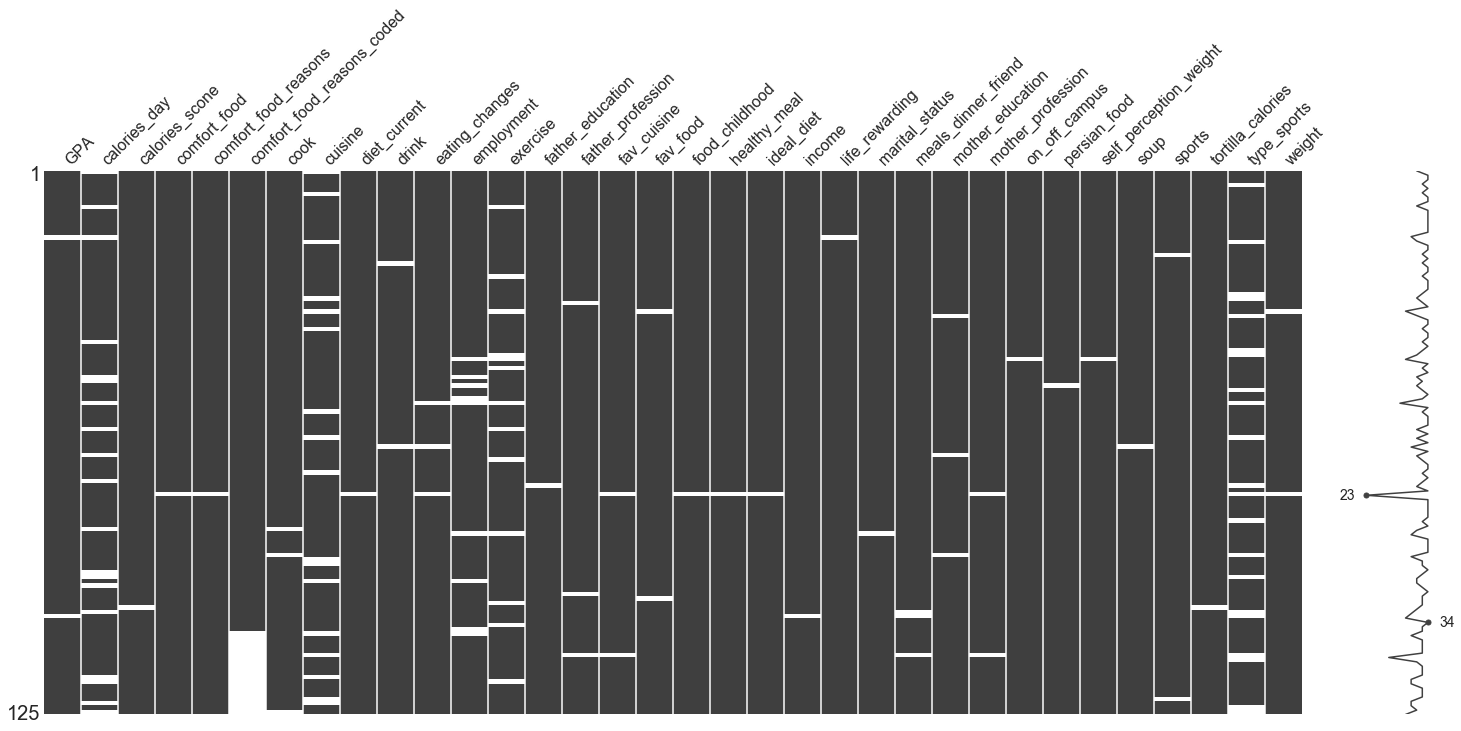

In [14]:
# Use missingno module for NaN's distribution
msno.matrix(df[df.columns[df.isnull().any()]])

Distribution of missing values across the dataset is pretty good with one exception. Feature called 'comfort_food_reasons_coded' has a significant gap at the end. I think it might be dangerous. Let's explore the importance of this feature.<br>
One more thing about this plot - on the right side we have specified rows with min. and max. amount of features that does not contain NaN's.<br>
<br>
When we look back at data frame we can notice a few related with each other features - **'comfort_food_reasons', 'comfort_food_reasons_coded', 'comfort_food_reasons_coded.1'.**<br>
It looks like comfort_food_reasons feature was converted to numerical values before. The third feature seems to be a copy of that we mentioned above. It does not appear on graph with missing values. Let's check if values of both do overlap.

In [15]:
(df['comfort_food_reasons_coded'] == df['comfort_food_reasons_coded.1']).value_counts()

True     105
False     20
dtype: int64

We can quickly check if the last 20 values are reasonable to the rest. Reasons like stress, boredom and sadness had 1-3 values. If there is  more unique reason then value goes higher. It looks ok for me.

In [16]:
df[['comfort_food_reasons', 'comfort_food_reasons_coded.1']].tail(20)

,comfort_food_reasons,comfort_food_reasons_coded.1
105,"Boredom, laziness, anger",2
106,Stress and sadness,1
107,"I am always stressed out, and bored when I am ...",1
108,"Stress, sadness, boredom",1
109,"Stress, frustration, self-consciousness",1
110,Sadness and cravings,3
111,boredom,2
112,"Sadness, happiness and boredom",3
113,Boredom and sadness,2
114,"sadness, happiness and hunger",3


That is confirmation of our assumption. We can drop both features -  **'comfort_food_reasons'** and **'comfort_food_reasons_coded'**.<br> The one we leave has no missing values. Let's rename it.

In [17]:
df.drop(['comfort_food_reasons', 'comfort_food_reasons_coded'], axis=1, inplace=True)
df.rename(columns={'comfort_food_reasons_coded.1': 'comfort_food_reasons'}, inplace=True)

## Correcting erroneous values

For some columns, there are some values that do not match obviously with others. This can be some random words in cells where there should be only digits. In previous subsections we assumed that two features can contain such erroneous values. We will investigate it in this subsection.

###  'GPA' feature

Let's try to replace non-numeric values to NaN and fix blended data.

In [18]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 joker', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

As we can see above, there is blended value and some cells without digits. Here we got 2 float values which are NaN's what we could see in features dtype table in one of previous subsections. We will fix that and replace incorrect and missing values with the most common feature's value. It should be fine since the values distribution does not emphasize one of the unique values in significant way.

In [19]:
# Take the most common value to fill. Assume that it will not oversimplify model (<5% of columns data to replace).
df['GPA'].value_counts().head()

3.5    13
3      11
3.2    10
3.7    10
3.3     9
Name: GPA, dtype: int64

In [20]:
# Use regex to clean blended data, fill missing values and set up dtype
df['GPA'] = df['GPA'].str.replace(r'[^\d\.\d+]', '').replace((np.nan, ''), '3.5').astype(float).round(2)

In [21]:
# Values after changes
df['GPA'].unique()

array([2.4 , 3.65, 3.3 , 3.2 , 3.5 , 2.25, 3.8 , 3.9 , 3.4 , 3.6 , 3.1 ,
       4.  , 2.2 , 3.87, 3.7 , 2.8 , 3.  , 3.89, 2.9 , 3.83, 3.29, 3.35,
       2.6 , 3.67, 3.73, 3.79, 2.71, 3.68, 3.75, 3.92, 3.77, 3.63, 3.88])

Text(0.5,1,"'GPA' distribution")

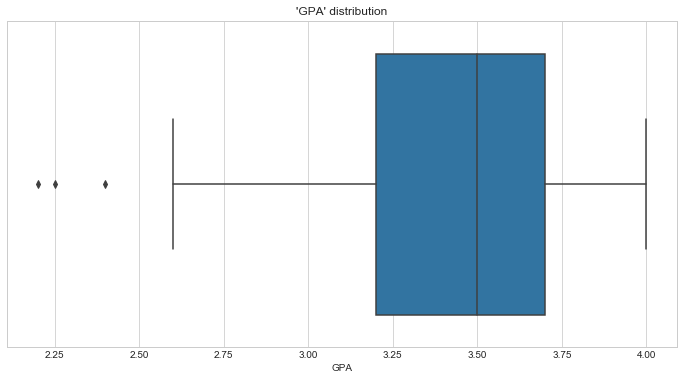

In [22]:
# Boxplot to visualize and check results
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(df['GPA'])
ax.set_title("'GPA' distribution")

### 'weight' feature

We encounter problem of the same type as above in this case. We will fix incorrect cells and fill missing values dependent on gender.

In [23]:
# Some strings, blended and missing values
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [24]:
# Clean blended values, non-numeric become NaN
df['weight'] = df['weight'].str.replace(r'[^\d\d\d]', '').replace('', np.nan).astype(float)

In [25]:
df['weight'].unique()

array([187., 155.,  nan, 240., 190., 180., 137., 125., 116., 110., 264.,
       123., 185., 145., 170., 135., 165., 175., 195., 105., 160., 167.,
       115., 205., 128., 150., 140., 120., 100., 113., 168., 169., 200.,
       265., 192., 118., 210., 112., 144., 130., 127., 129., 260., 184.,
       230., 138., 156.])

Let's make weight's distribution for each gender. To do this we can use seaborn's module. We have to drop missing values manually, because distplot function does not offer built-in parameter. Pandas dropna function returns a copy so it will not affect on our dataset.

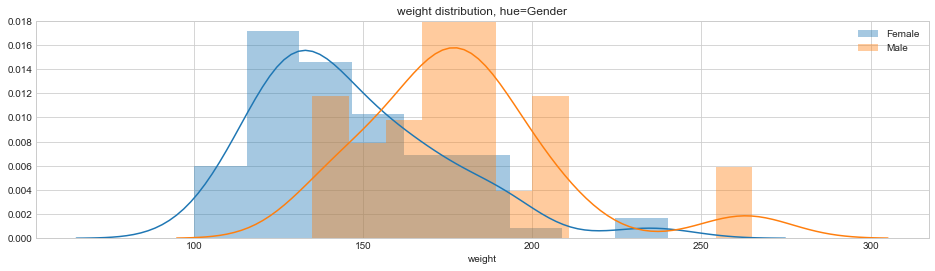

In [26]:
# Dict contains mean values of weights for both genders
weight_mean = {}
# Dict contains std values of weights for both genders
weight_std = {}

# Set plot size
fig, ax = plt.subplots(figsize=[16,4])

# Create two distributions for both genders
for gen, frame in df[['Gender', 'weight']].dropna().groupby('Gender'):
    weight_mean[gen] = frame['weight'].values.mean()
    weight_std[gen] = frame['weight'].values.std()
    sex_dict = {1: 0, 2: 1}
    sns.distplot(frame['weight'], ax=ax, label=['Female', 'Male'][sex_dict[gen]])

ax.set_title('weight distribution, hue=Gender')
ax.legend()

Different distributions between sets of values associated with Female/Male are good reason to consider while filling missing values.<br>
<br>
A deeper view on missing values of this feature.

In [27]:
# Let's check rows with NaN weight values
df[df['weight'].isnull()]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,cook,comfort_food_reasons,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
2,3.30,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food",1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
32,3.40,2,1,610,3.0,315.0,2,"Grandma's Chinese, Peruvian food from back hom...",5.0,4,NaN,"Not that balanced, but I try not to eat fatty ...",2,2.0,I eat more junk food now.,1,3,3,2.0,5,NaN,5.0,Lawyer,Spanish,2,NaN,"Spaghetti, Chicken, Won Tons",1,4,4,5,5,Plenty of greens and lean proteins,"Plenty of protein, carbs from vegetables and f...",7,5.0,5,5,8.0,1.0,"Pasta,Sushi,Steak",5.0,Lawyer,4,1.0,3,4,5.0,4.0,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN
74,2.71,2,2,265,2.0,420.0,1,NaN,2.0,9,4.0,NaN,4,2.0,NaN,3,4,1,3.0,3,2.0,1.0,retire,NaN,0,2.0,NaN,1,4,3,3,8,NaN,NaN,8,3.0,3,3,10.0,4.0,"rice and Chicken, sea food",1.0,NaN,2,2.0,3,5,3.0,3.0,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN


In [28]:
# Let's check how many NaN's these 3 rows have
inv_data = {} # key - observation index; values - (actual value, # of row's NaNs, gender)

for index, row in df[df['weight'].isnull()].iterrows():
    # Variable for printing results and getting # of NaNs
    temp = row.isnull().value_counts()
    print('Index: ', temp.name, " --- # of NaN's: ", temp.values[1])
    
    # Adds to dict 3 values by data frame's index - (actual value, # of row's NaNs, gender)
    inv_data[str(index)] = (row['weight'], temp.values[1], row['Gender'])        

Index:  2  --- # of NaN's:  1
Index:  32  --- # of NaN's:  4
Index:  74  --- # of NaN's:  10


We've created a dict with set of informations about particular rows. One of the observations contains 11 NaN's. Reffering to missing values distribution matrix, this observation has the largest amount of missing data. I was considering dropping that row, but most of absent values have premade numerical weights. The other thing is that we have small number of observations and we should not decrease that if it is not necessary.<br>
<br>
Missing values will be filled with random number based on mean value in regards to the standard deviation. I will leave a condition for dropping a row.

In [29]:
# Condition for dropping a row
drop_cond = df.shape[1]/2

for df_index, tuple_ in inv_data.items():
    # Row with # of NaNs > 'drop_cond' will be dropped.
    if tuple_[1] > drop_cond:
        df.drop(int(df_index), inplace=True)
    # Weight's NaN will be replaced with random number based on mean value 
    # in regards to the standard deviation.
    else:
        # Mean value of weights set in regards to gender
        mean_val = weight_mean[tuple_[2]]
        # The standard deviation value of weights set in regards to gender
        std_val = weight_std[tuple_[2]]
                
        # Random value creator in range defined by mean and the standard deviation 
        # value in regards to gender
        rand_val = np.random.randint(mean_val - std_val, mean_val + std_val)
        
        # Replacing NaN's with prepared value
        df['weight'].values[int(df_index)] = rand_val

In [30]:
# Finally we can change column dtype.
df['weight'] = df['weight'].astype(int)

# Data analysis

## Binary features

Plot represents distribution of dichotomous variables. In this dataset *1* is binary *0* (blue colour) and *2* is binary *1* (red colour). We can notice that some of features are imbalanced. If we decide to feed them into classifier without any preprocessing, it might result in worse predictions. In this scenario, classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. In many cases model will be predicting the majority class of target input.

In [31]:
# Slice binary features and their values amount without NaNs
x = df.describe().T
y = pd.Series(x[x['max'] == 2]['count'], index=x[x['max'] == 2].index)

# Percent values of 0/1 for each feature
zero_list = []
one_list = []

# Convert into percentages
for ind, col in y.iteritems():
    zero_list.append(((df[ind]==1).sum()*100)/col)
    one_list.append(((df[ind]==2).sum()*100)/col)

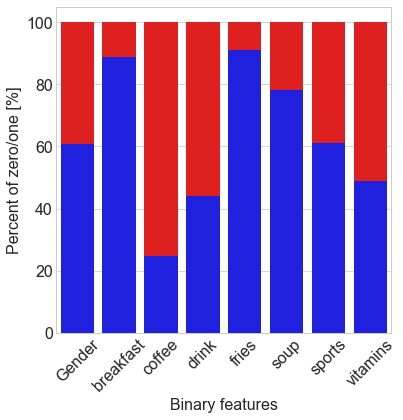

In [32]:
# Plot preparation
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))

# Create barplots
sns.barplot(ax=ax, x=x[x['max'] == 2].index, y=zero_list, color="blue")
sns.barplot(ax=ax, x=x[x['max'] == 2].index, y=one_list, bottom= zero_list, color="red")

# Plot labels
plt.ylabel('Percent of zero/one [%]', fontsize=16)
plt.xlabel('Binary features', fontsize=16)

# Plot's font settings
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tick_params(axis='both', which='major', labelsize=16)

## Categorical features

In this subsection we will explore habits represented by distribution on categorical data. To do this we will use barplots. For data preparation we will define a function called cat_bin(). It returns number of 0/1 values converted into percentages.

In [33]:
def cat_bin(data, x_var, hue_var, hue_class, x_names=[], hue_names=[]):
    # Prepare dichotomous and/or ordinal variable/s to graphic representation
    
    # Create data frame
    df = pd.DataFrame(index=x_names)
    
    # Prepare converted values for each hue
    for i, j in [(name, ind+1) for ind, name in enumerate(hue_names)]:
        df[i] = data[x_var][data[hue_var] == j].value_counts().sort_index().values
        df[i] = ((df[i]/df[i].sum())*100).round(1)
        
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'categories'}, inplace=True)
    
    return pd.melt(df, id_vars="categories", var_name=hue_class, value_name="percent")

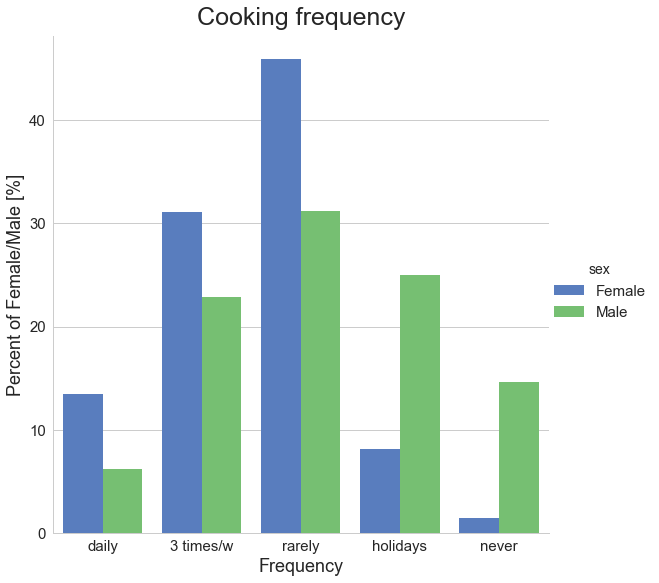

In [34]:
# New category names
objects = ['daily', '3 times/w', 'rarely','holidays', 'never']
# Data preparation for plotting
df_cook_sex = cat_bin(df, 'cook', 'Gender', 'sex', objects, hue_names=['Female', 'Male'])

with sns.plotting_context(context='notebook', font_scale=1.5):
    # Seaborn's barplot creator
    sns.factorplot(x='categories', y='percent', hue='sex', data=df_cook_sex, 
                   kind='bar', palette="muted", size=8)
    # Plot labels
    plt.xlabel('Frequency', fontsize=18)
    plt.ylabel('Percent of Female/Male [%]', fontsize=18)
    plt.title('Cooking frequency', y=1.01, size=25)

Distribution differences between both genders are significant. We can see that almost half of females cooks rarely. Cooking tendention is more frequent on the all levels in compare to males. 'Holidays' and 'never' categories are rather opposite to cooking in the academic year where males have fully dominance over females.<br>
<br>
Let's try to explore more features related to cooking frequency.

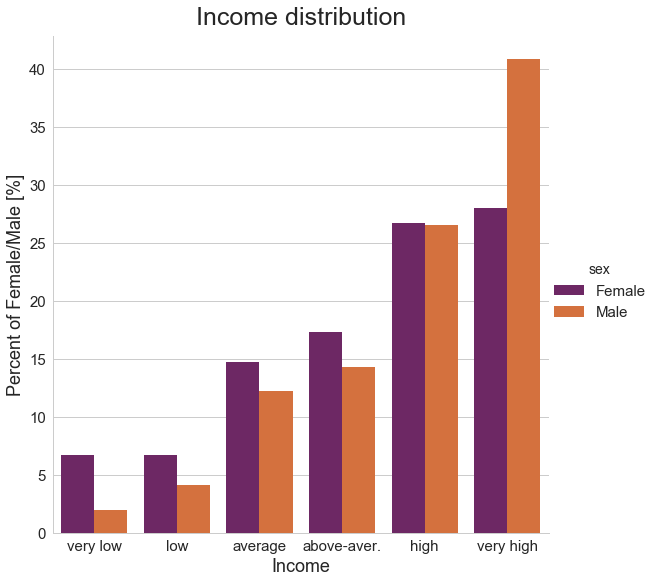

In [35]:
# New category names
objects = ['very low', 'low', 'average','above-aver.', 'high', 'very high']
# Data preparation for plotting
df_inc = cat_bin(df, 'income', 'Gender', 'sex', objects, hue_names=['Female', 'Male'])

with sns.plotting_context(context='notebook', font_scale=1.5):
    # Seaborn's barplot creator
    sns.factorplot(x='categories', y='percent', hue='sex', data=df_inc, 
                   kind='bar', palette='inferno', size=8)
    # Plot labels
    plt.xlabel('Income', fontsize=18)
    plt.ylabel('Percent of Female/Male [%]', fontsize=18)
    plt.title('Income distribution', y=1.01, size=25) 

Income distribution can in some way explain why males tends to cook less. More than a half people defined their family income as high or very high.

In [36]:
# New category names
objects = ['daily', '3 times/w', 'rarely','holidays', 'never']
# Create data frame
df_camp = pd.DataFrame(index=objects)

# Add new columns in df_camp with data
df_camp['on_campus'] = df['cook'][df['on_off_campus'] == 1].value_counts().sort_index().values
# Values != 1 are different types of accommodation outside the campus
df_camp['off_campus'] = df['cook'][df['on_off_campus'] > 1].value_counts().sort_index().values

# Prepare converted values for each hue
df_camp['on_campus'] = ((df_camp['on_campus']/df_camp['on_campus'].sum())*100).round(1)
df_camp['off_campus'] = ((df_camp['off_campus']/df_camp['off_campus'].sum())*100).round(1)

df_camp.reset_index(inplace=True)
df_camp.rename(columns={'index': 'categories'}, inplace=True)

# Reshaping data frame
df_camp = pd.melt(df_camp, id_vars="categories", var_name='on/off campus', value_name="percent")  

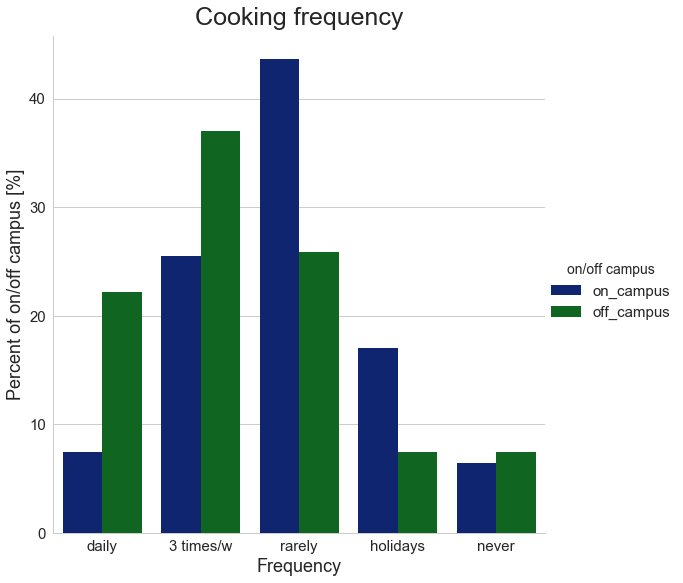

In [37]:
with sns.plotting_context(context='notebook', font_scale=1.5):
    # Seaborn's barplot creator
    sns.factorplot(x='categories', y='percent', hue='on/off campus', data=df_camp, 
                   kind='bar', palette="dark", size=8)
    # Plot labels
    plt.xlabel('Frequency', fontsize=18)
    plt.ylabel('Percent of on/off campus [%]', fontsize=18)
    plt.title('Cooking frequency', y=1.01, size=25)  

The next feature we can look at is on_off_campus. It shows us distribution of cooking frequency of people living on or off campus. Clearly people who lives off the campus tends to cook more often.<br>
<br>
Let's check correlation between features 'parents_cook' and 'cook'. Both are categorical and the first one try to measure influence of parents habits when we talk about cooking. Features are correlated with each other. We used Spearman's rank correlation method.

In [38]:
df_parent = df[['parents_cook', 'cook']]
df_parent.corr(method = 'spearman')

,parents_cook,cook
parents_cook,1.000000,0.228832
cook,0.228832,1.000000


In this part of subsection we will check some other features related with food.

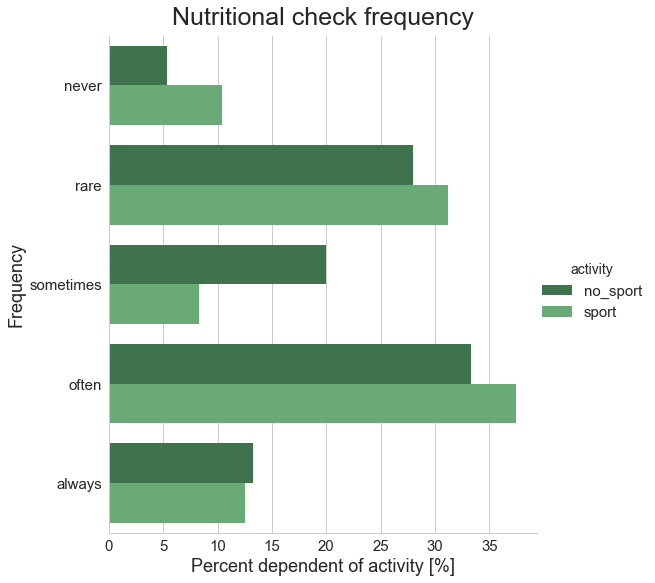

In [39]:
# New category names
frequency = ['never', 'rare', 'sometimes', 'often', 'always']
# Data preparation for plotting
df_sport = cat_bin(df, 'nutritional_check', 'sports', 'activity', 
                   frequency, hue_names=['no_sport', 'sport'])

with sns.plotting_context(context='notebook', font_scale=1.5):
    # Seaborn's barplot creator
    sns.factorplot(x='percent', y="categories", hue="activity", data=df_sport, 
                   kind='bar', palette="Greens_d", size=8)
    # Plot labels
    plt.xlabel('Percent dependent of activity [%]', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.title('Nutritional check frequency', y=1.01, size=25)

In [40]:
sport_corr = df[['nutritional_check', 'sports']]
sport_corr.corr(method = 'kendall')

,nutritional_check,sports
nutritional_check,1.000000,-0.034389
sports,-0.034389,1.000000


The plot above tries to explore, how nutritional check frequency is connected with sport activity. Perhaps people who has some sort of sport activity, put more attention on more frequent nutritional check. In this case we also checked correlation between dichotomous and ordinal variable. There is no real correlation.

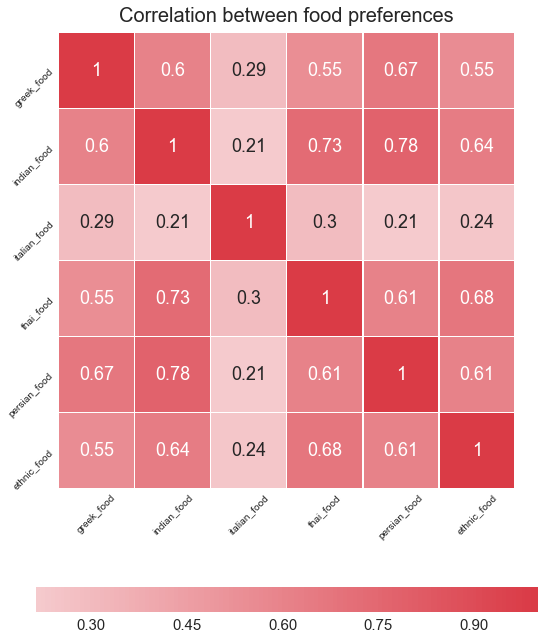

In [41]:
# New category names
food = ['greek_food', 'indian_food', 'italian_food', 'thai_food', 'persian_food', 'ethnic_food']
# Set diverging palette
cmap = sns.diverging_palette(50, 10, as_cmap=True)
# Plot preparation
plt.figure(figsize=(12,12))
plt.title('Correlation between food preferences', y=1.01, size=20)

with sns.plotting_context(context='notebook', font_scale=1.5):
    # Seaborn's heatmap creator
    g = sns.heatmap(df[food].corr(method='spearman'),linewidths=0.5,vmax=1.0, square=True, center=0,
                    cmap=cmap, annot=True, cbar_kws={"shrink": .75, "orientation": "horizontal"})
    # Plot labels
    loc, labels = plt.xticks()
    g.set_xticklabels(labels, rotation=45)
    g.set_yticklabels(labels, rotation=45)

Heatmap above shows us correlation between different types of world cuisines. Surveyed people weighted their preferences in 1-5 point scale. The correlation between these variables is very strong. We can conclude that people have similar taste when it comes to types of world cuisines. The only one feature that is not dominant is 'italian_food' which seems to be the best choice if we want apply more than one of these to our prediction model.

## Categorical and continuous features

Plotting experiment of 2 kinds of features. I've tried to implement features that seems like measurement of veggies/fruit days in their nutrition and check possible impact of these on weight. I was wondering if it is justifed to use ANOVA model here.

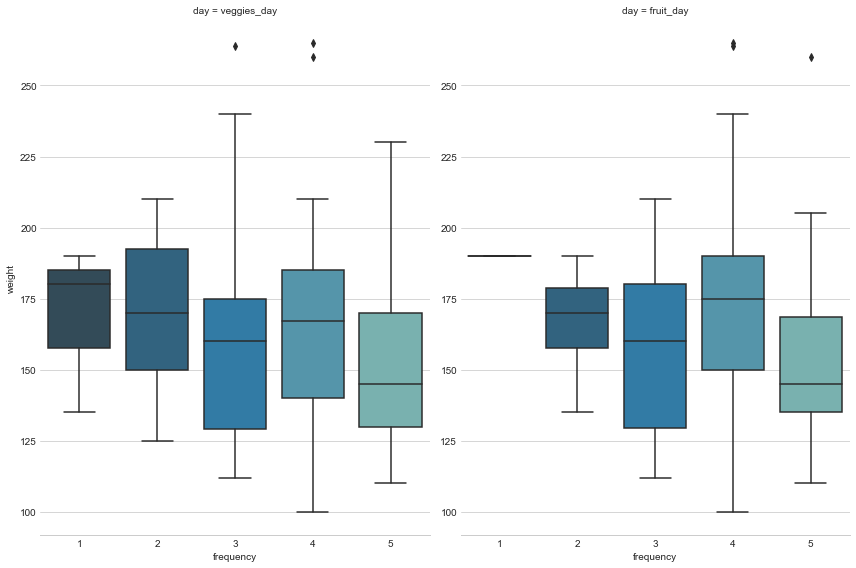

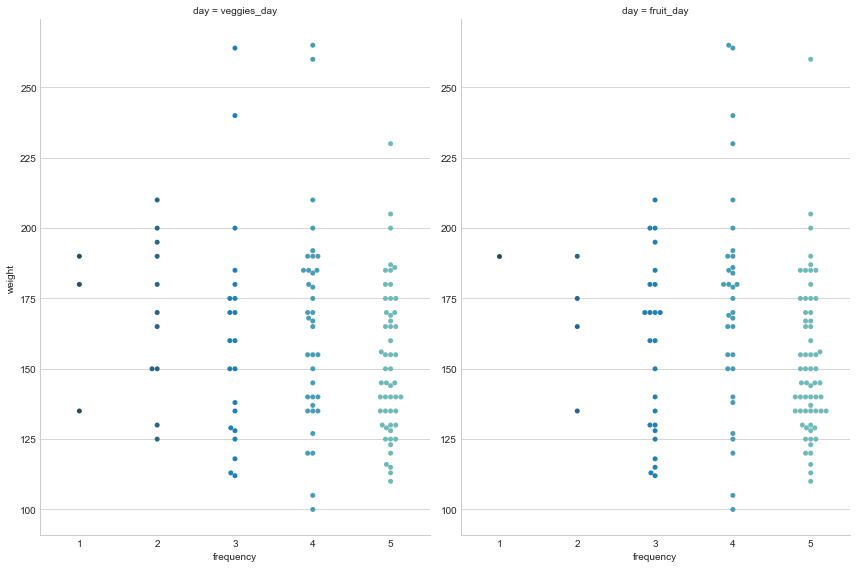

In [42]:
# Slice of data frame
df_weight = df[['veggies_day', 'fruit_day', 'weight']]

# Data preparation for plotting
df_weight = pd.melt(df_weight, id_vars='weight', var_name='day', value_name="frequency")

# Seaborn's barplot creator
g = sns.factorplot(x="frequency", y="weight", col="day", data=df_weight, 
                   kind='box', palette="YlGnBu_d", size=8, aspect=.75)
g.despine(left=True)
sns.factorplot(x="frequency", y="weight", col="day", data=df_weight, 
               kind='swarm', palette="YlGnBu_d", size=8, aspect=.75)
g

# Quick summary

Raw data made us a lot of effort in exploring dataset and taking a deep view of a few features. Fixing a blended values had to be done before visualization plots could happen. That was one of the goals we focused on. The whole preprocessing part of the data is not finished. Categorical features need to be encoded before any implementation. For this we can use one hot encoder. Amount of features force us to choose a set of variables for a classifier. Splitting up whole set of categorical features would end up with huge amount of columns. Please remember that initial dataset has approx. 2:1 ratio of observations/features. Another thing worth mentioning is grouping continuous values into categories if it is possible and handling the rest missing values. None of the classification models were created, because that was not the goal of this kernel. Small number of observations was enough to play and find some connections between features.<br>
<br>
Variety of features gives a lot of space for data exploring finding different correlations. I am open to any suggestions as well as comments pointing out substantive errors.

# References

[1] Porto Seguro Exploratory Analysis and Prediction, Kaggle Kernel, [link](https://www.kaggle.com/gpreda/porto-seguro-exploratory-analysis-and-prediction) <br>
[2] End to End Project with Python, Kaggle Kernel, [link](https://www.kaggle.com/niklasdonges/end-to-end-project-with-python) <br>
[3] Some basic stats: t-test, spearman's r, Kaggle Kernel, [link](https://www.kaggle.com/borapajo/some-basic-stats-t-test-spearman-s-r)